<a href="https://colab.research.google.com/github/RodAnC2210/first_stepsDS/blob/main/Solucion_Reto_SC_63_RodrigoCabello.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Reto | Mercadotecnia telefónica con aprendizaje supervisado

1.	Deberás utilizar el archivo llamado bank_marketing.csv. con los datos de problema.
2.	Utilizar el archivo bank-names.txt para obtener información de cada una de las variables.
3.	Crear un proyecto tipo Jupyter Notebook en Google-Colab llamado Solucion_Reto_SC_63_<nombre_y_apellido_del_estudiante>.ipynb.
4.	Incluye las librerías que consideres adecuadas y carga los datos del archivo en una variable llamada “data”.


5.	Obtener la información de dicha base de datos que incluya el número de registros, el total de variables, el tipo de cada variable, la cantidad de datos perdidos de cada variable en caso de que existan.

In [1]:
import pandas as pd

bank_marketing = pd.read_csv('/content/bank_marketing_RETO_DS_AS.csv')
bank_marketing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        9000 non-null   int64 
 1   job        9000 non-null   object
 2   marital    9000 non-null   object
 3   education  9000 non-null   object
 4   default    9000 non-null   object
 5   balance    9000 non-null   int64 
 6   housing    9000 non-null   object
 7   loan       9000 non-null   object
 8   contact    9000 non-null   object
 9   day        9000 non-null   int64 
 10  month      9000 non-null   object
 11  duration   9000 non-null   int64 
 12  campaign   9000 non-null   int64 
 13  pdays      9000 non-null   int64 
 14  previous   9000 non-null   int64 
 15  poutcome   9000 non-null   object
 16  y          9000 non-null   object
dtypes: int64(7), object(10)
memory usage: 1.2+ MB


In [2]:
bank_marketing.describe()

,age,balance,day,duration,campaign,pdays,previous
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,41.090556,1482.262778,15.619556,353.832778,2.520111,50.511333,0.788889
std,11.664253,3031.013197,8.345305,336.945158,2.737758,107.691963,2.210273
min,18.000000,-3058.000000,1.000000,3.000000,1.000000,-1.000000,0.000000
25%,32.000000,109.000000,8.000000,131.000000,1.000000,-1.000000,0.000000
50%,39.000000,519.000000,15.000000,240.500000,2.000000,-1.000000,0.000000
75%,49.000000,1646.500000,21.000000,462.000000,3.000000,-1.000000,0.000000
max,95.000000,81204.000000,31.000000,3253.000000,58.000000,850.000000,58.000000


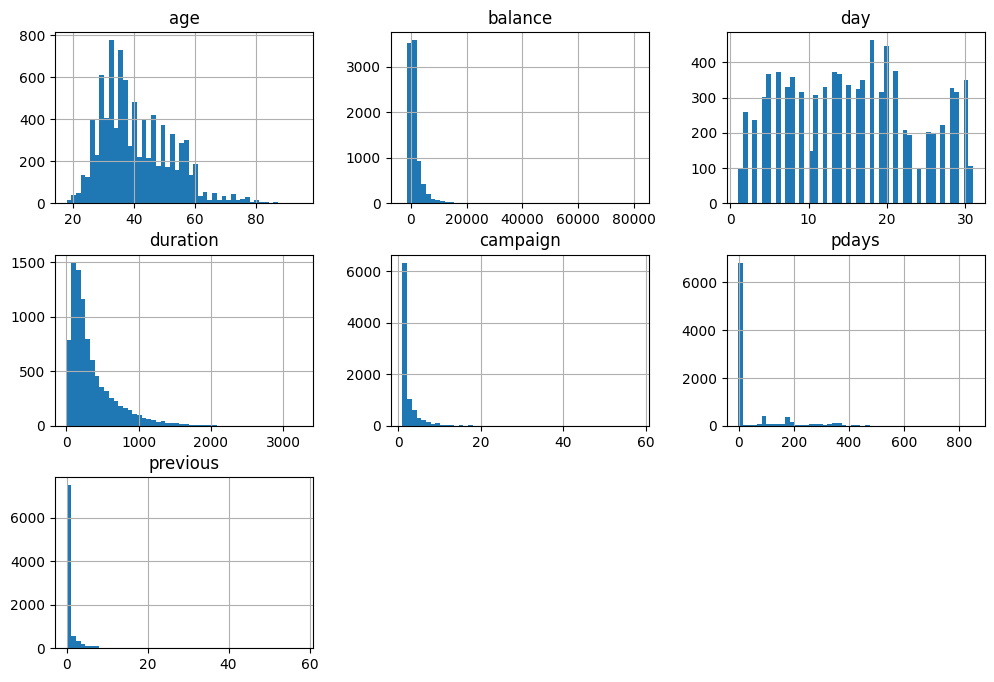

In [3]:
import matplotlib.pyplot as plt
bank_marketing.hist(bins = 50, figsize=(12,8))
plt.show()

6.	Transforma las variables categóricas de manera que puedan ser tratadas numéricamente. Justifica si utilizas LabelEncoder o OneHotEcoder.
7.	Transforma las variables numéricas en los casos que se tenga algún tipo de sesgo.

In [4]:
from sklearn.preprocessing import OrdinalEncoder, StandardScaler
categorical_data = bank_marketing.select_dtypes(include=['object']).columns
numerical_data = bank_marketing.select_dtypes(include=['int64']).columns

encoder = OrdinalEncoder()
cat_encoded = pd.DataFrame(encoder.fit_transform(bank_marketing[categorical_data]),
                           columns = categorical_data)

scaler = StandardScaler()
num_scaled = pd.DataFrame(scaler.fit_transform(bank_marketing[numerical_data]),
                          columns = numerical_data)

final_data = pd.concat([cat_encoded, num_scaled], axis = 1)
final_data

,job,marital,education,default,housing,loan,contact,month,poutcome,y,age,balance,day,duration,campaign,pdays,previous
0,6.0,1.0,2.0,0.0,0.0,0.0,0.0,9.0,2.0,1.0,-0.865132,0.390563,-0.673417,-0.106352,-0.189988,0.431706,2.357808
1,10.0,2.0,3.0,0.0,0.0,0.0,0.0,11.0,3.0,1.0,-1.036605,0.033567,-1.152755,-0.323016,-0.555270,-0.478348,-0.356939
2,1.0,1.0,1.0,0.0,1.0,0.0,0.0,9.0,3.0,0.0,-0.007764,0.220974,0.165425,0.045016,-0.555270,-0.478348,-0.356939
3,1.0,1.0,1.0,0.0,1.0,0.0,0.0,5.0,3.0,0.0,0.763867,-0.461344,0.165425,-0.996754,2.001709,-0.478348,-0.356939
4,0.0,1.0,1.0,0.0,0.0,0.0,0.0,5.0,2.0,1.0,-0.093501,-0.489059,1.483605,0.421953,-0.189988,1.221038,4.620098
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8995,1.0,1.0,1.0,0.0,1.0,1.0,2.0,8.0,3.0,0.0,0.077973,-0.385458,0.045590,-0.251784,-0.189988,-0.478348,-0.356939
8996,1.0,1.0,1.0,0.0,1.0,0.0,2.0,8.0,3.0,0.0,-0.779395,-0.327058,-0.913086,-0.388313,-0.189988,-0.478348,-0.356939
8997,7.0,2.0,1.0,0.0,0.0,0.0,2.0,6.0,3.0,0.0,0.249446,0.463150,0.524928,-0.958170,-0.555270,-0.478348,-0.356939
8998,7.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,3.0,1.0,1.364025,-0.327058,-0.074244,2.561886,0.175295,-0.478348,-0.356939


In [5]:
matrix_corr = final_data.corr()

In [6]:
matrix_corr['y'].sort_values(ascending=False)

,y
y,1.000000
duration,0.468315
previous,0.146382
pdays,0.129455
education,0.107119
balance,0.081686
job,0.065197
marital,0.053806
age,0.036028
month,-0.027041


9.	Particiona los datos en los conjuntos de entrenamiento, validación y prueba en 60%, 20% y 20%, respectivamente.

In [7]:
from sklearn.model_selection import train_test_split

X = final_data.drop('y', axis=1).to_numpy()
y = final_data['y'].to_numpy()

X_train, X_validation_test, y_train, y_validation_test = \
    train_test_split(X, y, train_size = 0.6, random_state = 42)

X_validation, X_test, y_validation, y_test = \
    train_test_split(X_validation_test, y_validation_test, test_size = 0.5, random_state = 42)

print('Conjunto de entrenamiento:', X_train.shape, y_train.shape)
print('Conjunto de validación:', X_validation.shape, y_validation.shape)
print('Conjunto de prueba:', X_test.shape, y_test.shape)

Conjunto de entrenamiento: (5400, 16) (5400,)
Conjunto de validación: (1800, 16) (1800,)
Conjunto de prueba: (1800, 16) (1800,)


10.	Aplica el modelo Regresión Logística en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor resultado.

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear'],
}

grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy', verbose = 1)
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)
print("Best score", grid.best_score_)

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best Parameters: {'C': 0.1, 'penalty': 'l1', 'solver': 'liblinear'}
Best score 0.7944444444444445


In [9]:
model_LR2 = LogisticRegression(C=0.1, penalty='l1', solver='liblinear', random_state=42)
model_LR2.fit(X_train, y_train)
model_LR2.score(X_validation, y_validation)

0.7888888888888889

In [10]:
from sklearn.metrics import confusion_matrix
y_pred = model_LR2.predict(X_validation)
confusion_matrix(y_validation, y_pred)

array([[896, 162],
       [218, 524]])

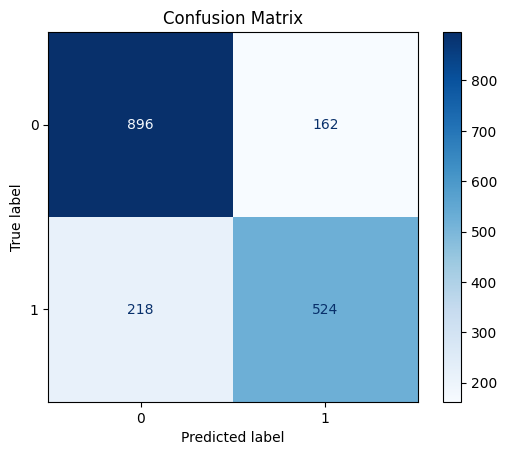

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
cm = confusion_matrix(y_validation, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

11.	Aplica el modelo Red Neuronal en el conjunto de entrenamiento. Valida el modelo con las predicciones del conjunto de validación y su matriz de confusión. Ajusta los parámetros del modelo hasta obtener tu mejor modelo, entre ellos el número de neuronas y capas ocultas.

In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

param_grid = {
    'hidden_layer_sizes': [(100,100), (150,150), (200,200)],
    'activation': ['relu'],
    'solver': ['adam'],
    'alpha': [1],
    'learning_rate': ['constant']
}

mlp = MLPClassifier(max_iter=1000)
grid2 = GridSearchCV(mlp, param_grid, cv=5, scoring='accuracy', verbose=1)
grid2.fit(X_train, y_train)
print("Best Params:", grid2.best_params_)
print("Best Score:", grid2.best_score_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best Params: {'activation': 'relu', 'alpha': 1, 'hidden_layer_sizes': (200, 200), 'learning_rate': 'constant', 'solver': 'adam'}
Best Score: 0.8218518518518518


In [13]:
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100),
                    activation='relu',
                    alpha=1,
                    learning_rate='constant',
                    random_state=42,
                    solver= 'adam')
mlp2.fit(X_train, y_train)
y_pred2 = mlp2.predict(X_validation)
print(mlp2.score(X_validation, y_validation))
confusion_matrix(y_validation, y_pred2)

0.8155555555555556


array([[898, 160],
       [172, 570]])

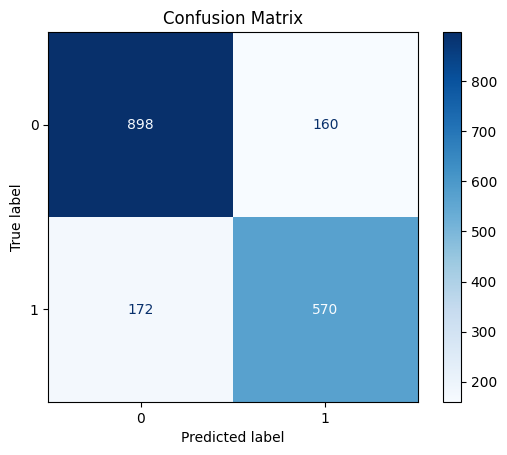

In [15]:
cm = confusion_matrix(y_validation, y_pred2)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

12.	Selecciona el mejor modelo encontrado en los incisos anteriores y utiliza el conjunto de prueba para obtener el desempeño final del modelo y su matriz de confusión.

In [16]:
mlp2.fit(X_test, y_test)
mlp2.score(X_test, y_test)

0.8655555555555555

In [17]:
y_pred3 = mlp2.predict(X_test)
confusion_matrix(y_pred3, y_test)

array([[926, 163],
       [ 79, 632]])

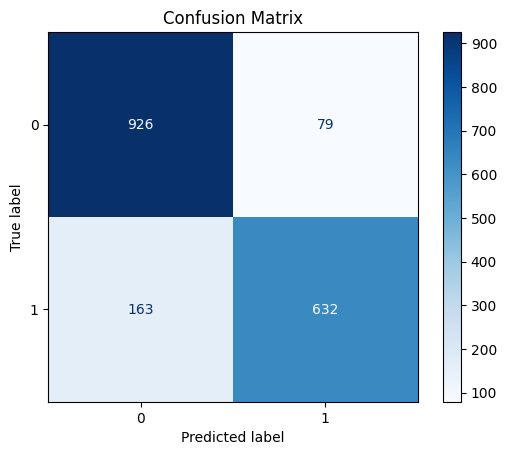

In [18]:
cm = confusion_matrix(y_test, y_pred3)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels= [0,1])
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

6.a Justifica el uso de LabelEncoder o OneHotEcoder:

  Utilice OrdinalEncoder() para no generar mayor cantidad de columnas y aumentar la densidad del dataframe.

13.a Incluye tus conclusiones de este problema en particular, ¿qué puedes decir acerca
del uso de técnicas de inteligencia artificial en problemas de mercadotecnia?

  Se eligió el método MLPClassifier() (Red Neuronal) por una exactitud mayor que el modelo de regresión logistica. Si bien, aún es un resultado aún con mucha oportunidad de mejora, probablemente invirtiendo más tiempo en la selección de variables y en la transformación más exhaustiva de las mismas para un modelo más exacto. De igual manera, no hay mucha diferencia en el rendimiento del modelo de LogisticRegression(), si se toma en cuenta el tiempo de ejecución del código, al ser un modelo más simple, podría optarse por utilizar un modelo de regresión logistica.

  En este caso para situaciones de marketing tal vez sea más práctico utilizar modelos de regresión logistica por tiempo ejecución y mayor facilidad para ajuste del modelo en situaciones no tan complejas y dejar las técnicas de redes neuronales para situaciones de mayor complejidad.
